There are 6217 results which is evaluated differently at chckpoint 9 and checkpoint 15 
Now we pick 10 images randomly:
[7179  816  384 4326 9006 5799 6997 1091 8405 2730]


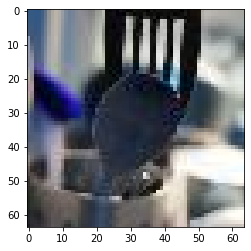

The right label is: wooden spoon
check 9:[ 24 136 180  59  65]
['Chihuahua', "potter's wheel", 'ice lolly, lolly, lollipop, popsicle', 'abacus', 'barbershop']
check 15:[ 77 123 136  60  24]
['bow tie, bow-tie, bowtie', 'neck brace', "potter's wheel", "academic gown, academic robe, judge's robe", 'Chihuahua']




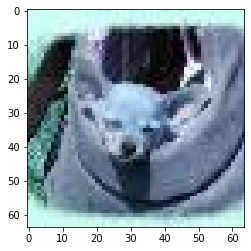

The right label is: Chihuahua
check 9:[186 192 189 182  38]
['orange', 'potpie', 'pomegranate', 'mashed potato', 'bee']
check 15:[192  41  18 178   7]
['potpie', 'cockroach, roach', 'American lobster, Northern lobster, Maine lobster, Homarus americanus', 'guacamole', 'scorpion']




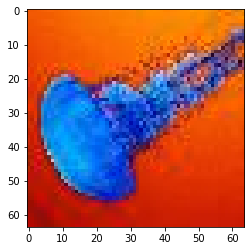

The right label is: jellyfish
check 9:[167 166  59 146  65]
['turnstile', 'trolleybus, trolley coach, trackless trolley', 'abacus', 'scoreboard', 'barbershop']
check 15:[166 146 154  93  78]
['trolleybus, trolley coach, trackless trolley', 'scoreboard', 'steel arch bridge', 'confectionery, confectionary, candy store', 'brass, memorial tablet, plaque']




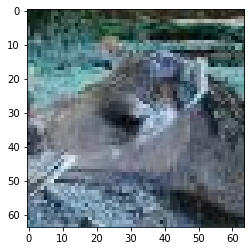

The right label is: Arabian camel, dromedary, Camelus dromedarius
check 9:[130 135 141  86 172]
['pill bottle', 'pop bottle, soda bottle', 'remote control, remote', 'cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM', 'water jug']
check 15:[ 80  67  86 130 127]
['bucket, pail', 'barrel, cask', 'cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM', 'pill bottle', 'parking meter']




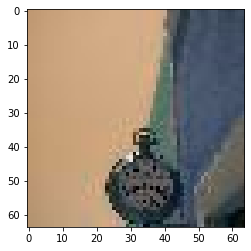

The right label is: stopwatch, stop watch
check 9:[198  87  70 104 156]
['seashore, coast, seacoast, sea-coast', 'CD player', 'beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon', 'frying pan, frypan, skillet', 'sunglasses, dark glasses, shades']
check 15:[ 94  70  96 116 103]
['convertible', 'beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon', 'dam, dike, dyke', 'limousine, limo', 'freight car']




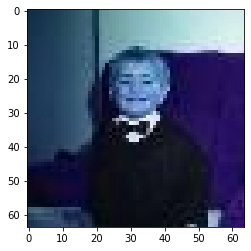

The right label is: bow tie, bow-tie, bowtie
check 9:[ 14   6  59 188 134]
['brain coral', 'trilobite', 'abacus', 'banana', 'poncho']
check 15:[  3   2 139 169  14]
['tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui', 'bullfrog, Rana catesbeiana', 'reel', 'vestment', 'brain coral']




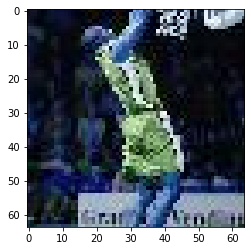

The right label is: basketball
check 9:[188 187 102  45  83]
['banana', 'lemon', 'fountain', 'sulphur butterfly, sulfur butterfly', 'candle, taper, wax light']
check 15:[ 45 188 187 161  79]
['sulphur butterfly, sulfur butterfly', 'banana', 'lemon', 'teddy, teddy bear', 'broom']




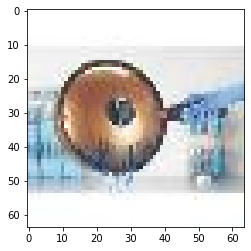

The right label is: frying pan, frypan, skillet
check 9:[182 179 178  90 190]
['mashed potato', 'ice cream, icecream', 'guacamole', 'Christmas stocking', 'meat loaf, meatloaf']
check 15:[ 90 135 161 179 172]
['Christmas stocking', 'pop bottle, soda bottle', 'teddy, teddy bear', 'ice cream, icecream', 'water jug']




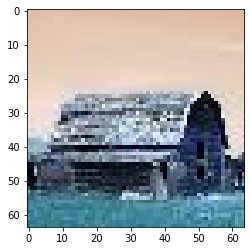

The right label is: barn
check 9:[ 46 196  14 148  19]
['sea cucumber, holothurian', 'coral reef', 'brain coral', 'snorkel', 'spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish']
check 15:[ 14 196  46  19  17]
['brain coral', 'coral reef', 'sea cucumber, holothurian', 'spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish', 'sea slug, nudibranch']




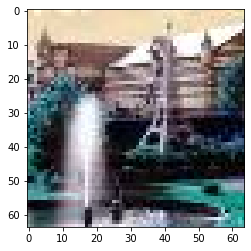

The right label is: fountain
check 9:[138 180 179 100 147]
['punching bag, punch bag, punching ball, punchball', 'ice lolly, lolly, lollipop, popsicle', 'ice cream, icecream', 'dumbbell', 'sewing machine']
check 15:[123 136 138  93  29]
['neck brace', "potter's wheel", 'punching bag, punch bag, punching ball, punchball', 'confectionery, confectionary, candy store', 'standard poodle']




In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import torch
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
resul_9 = torch.load('C:/Users/86183/result_9.pt').t().numpy()
resul_15 = torch.load('C:/Users/86183/result_15.pt').t().numpy()
resul_9_top1 = resul_9[0]
resul_15_top1 = resul_15[0]
noteq_idx = np.where(resul_9_top1 != resul_15_top1)[0]
print("There are %d results which is evaluated differently at chckpoint 9 and checkpoint 15 "%len(noteq_idx))
print("Now we pick 10 images randomly:")
pick10 = np.random.choice(noteq_idx,10,replace = False)
print(pick10)
dir = "D:/Python_Homework2/tiny-imagenet-200/tiny-imagenet-200/val/images"

import openpyxl
workbook = openpyxl.load_workbook('D:/Python_Homework2/tiny-imagenet-200/tiny-imagenet-200/val/1.xlsx')
sheet = workbook['Sheet1']
workbook2 = openpyxl.load_workbook('D:/Python_Homework2/tiny-imagenet-200/tiny-imagenet-200/words.xlsx')
sheet2 = workbook2['Sheet1']
import torchvision.datasets as datasets
train_dataset = datasets.ImageFolder('D:/Python_Homework2/tiny-imagenet-200/tiny-imagenet-200/train')

def trans_target_to_message(i,class_to_idx):
    j = 0 
    for k,v in class_to_idx.items():
        if v == i:
            classe = k
            break
    for j in range(sheet2.max_row):
        if sheet2.cell(row=j+1, column=1).value == classe:
            return sheet2.cell(row=j+1, column=2).value

for i in pick10:
    fname = dir+ "/val_" + str(i) + ".JPEG"
    img= cv2.imread(fname)
    mes9 = resul_9[:,i]
    for j in range(sheet2.max_row):
        classe = sheet.cell(row=i+1,column=2).value
        if sheet2.cell(row=j+1, column=1).value == classe:
            label_mes = sheet2.cell(row=j+1, column=2).value
            break
    
    message9 = [trans_target_to_message(j,train_dataset.class_to_idx) for j in mes9]
    mes15 = resul_15[:,i]
    message15 = [trans_target_to_message(j,train_dataset.class_to_idx) for j in mes15]
    plt.imshow(img)
    plt.show()
    print("The right label is: " + label_mes)
    print("check 9:"+str(mes9))
    print(message9)
    print("check 15:"+str(mes15))
    print(message15)
    print("\n")